#### Phase 1: Access the Pima Indians Diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve)

In [2]:
cols = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"
]

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [3]:
df = pd.read_csv(url, names=cols)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


#### Phase 2: PDA (Preliminary Data Analysis) - Initial Data Insepection

In [4]:
#Step 1: Shape of the data
df.shape

(768, 9)

In [5]:
#Step 2: Data-Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Step 3: Summary Stats
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.8,3.4,0.0,1.0,3.0,6.0,17.0
Glucose,768.0,120.9,32.0,0.0,99.0,117.0,140.2,199.0
BloodPressure,768.0,69.1,19.4,0.0,62.0,72.0,80.0,122.0
SkinThickness,768.0,20.5,16.0,0.0,0.0,23.0,32.0,99.0
Insulin,768.0,79.8,115.2,0.0,0.0,30.5,127.2,846.0
BMI,768.0,32.0,7.9,0.0,27.3,32.0,36.6,67.1
DiabetesPedigreeFunction,768.0,0.5,0.3,0.1,0.2,0.4,0.6,2.4
Age,768.0,33.2,11.8,21.0,24.0,29.0,41.0,81.0
Outcome,768.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [7]:
#Step 4: Missing Values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Step 5: Check the Target Balance
counts = df.Outcome.value_counts()
percent = df.Outcome.value_counts(normalize=True) * 100

target_summary = pd.DataFrame({ "Count": counts, "Percentage": percent.round(2)})
target_summary

,Count,Percentage
Outcome,,
0,500,65.1
1,268,34.9


***Dataset is moderately imbalanced.***

In [9]:
# (df.Outcome.value_counts(normalize=True) * 100).round(2)

In [10]:
# Step 6: Duplicate Check
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Step 7: Check Invalid Zeros: Check Invalid Zeros, as in some columns zero means missing values
cols_with_zero_issue = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols_with_zero_issue:
    print(col, "zeros:", (df[col] == 0).sum())

Glucose zeros: 5
BloodPressure zeros: 35
SkinThickness zeros: 227
Insulin zeros: 374
BMI zeros: 11


#### Phase 3: EDA (Exploratory Data Analysis)

In [13]:
# Step 1: Fix Invalid Zeros
cols_with_zero_issue = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

df[cols_with_zero_issue] = df[cols_with_zero_issue].replace(0, np.nan)

In [14]:
# Step 2: Check and fix the missing values
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.fillna(df.median(), inplace=True)

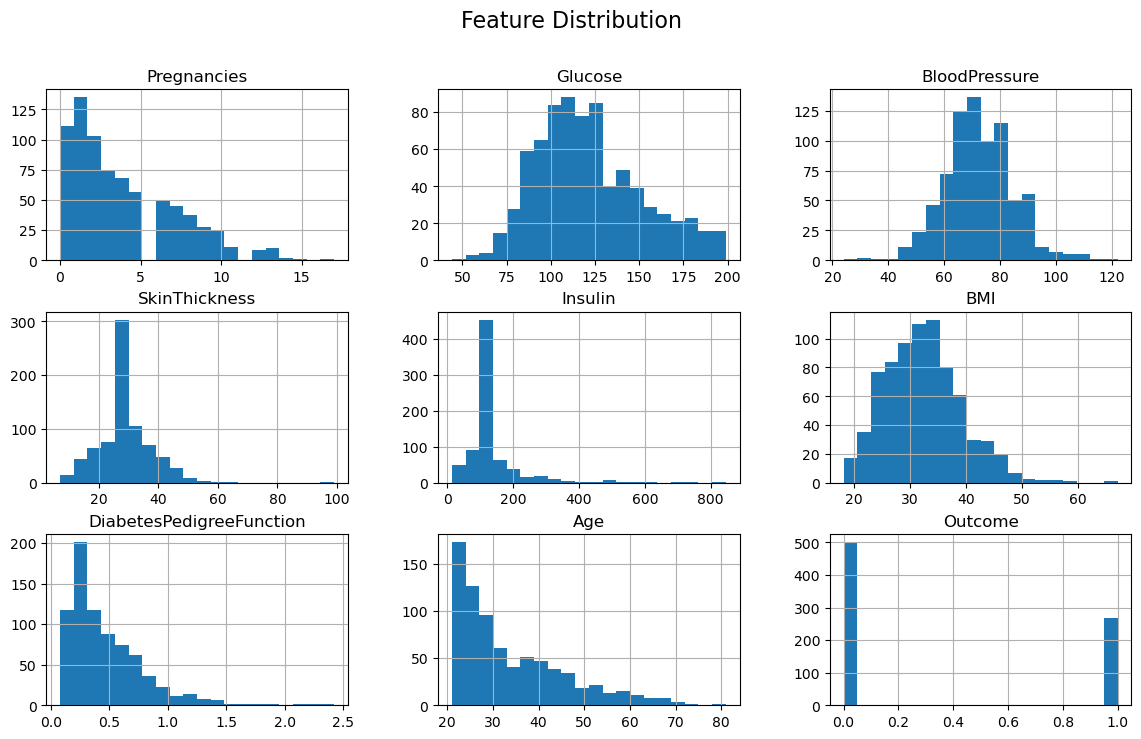

In [16]:
# Step 3: Feature Distribution : To understand Skewness and Spread
df.hist(figsize=(14,8), bins=20)
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

***Notes:***
* Insulin is highly skewed
* BMI slightly right skewed
* Age right skewed

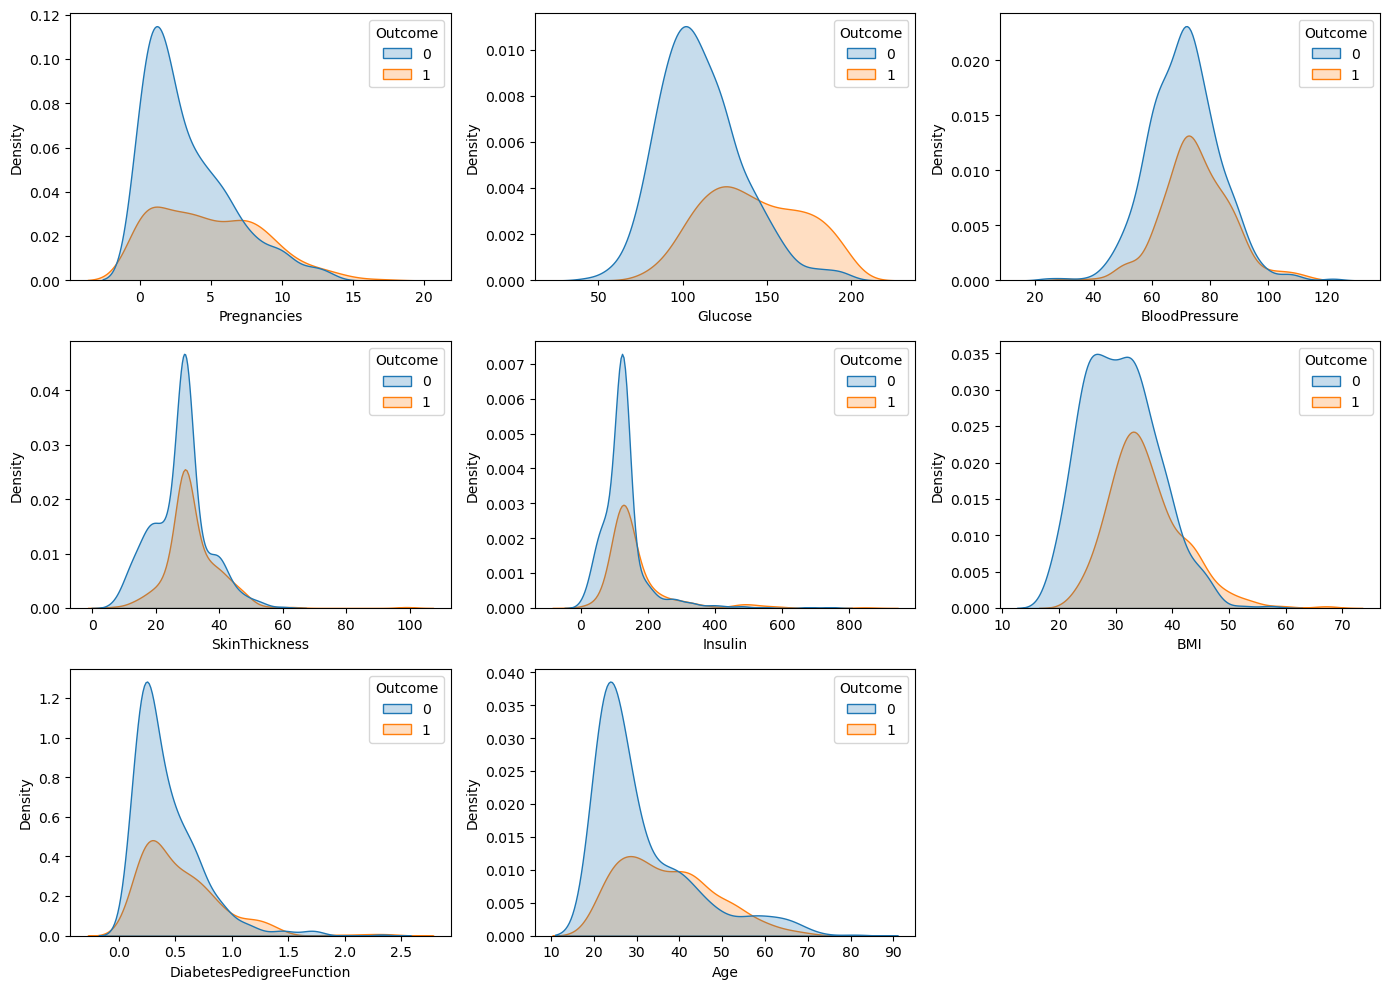

In [17]:
# Step 4: Outcome-wise Distribution
import seaborn as sns

plt.figure(figsize=(14,10))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=df, x=col, hue="Outcome", fill=True)

plt.tight_layout()
plt.show()

***Key Insights:***
* Strong Separation for : Glucose, BMI, AGE
* Weak Separation for: BloodPressure, SkinThickness

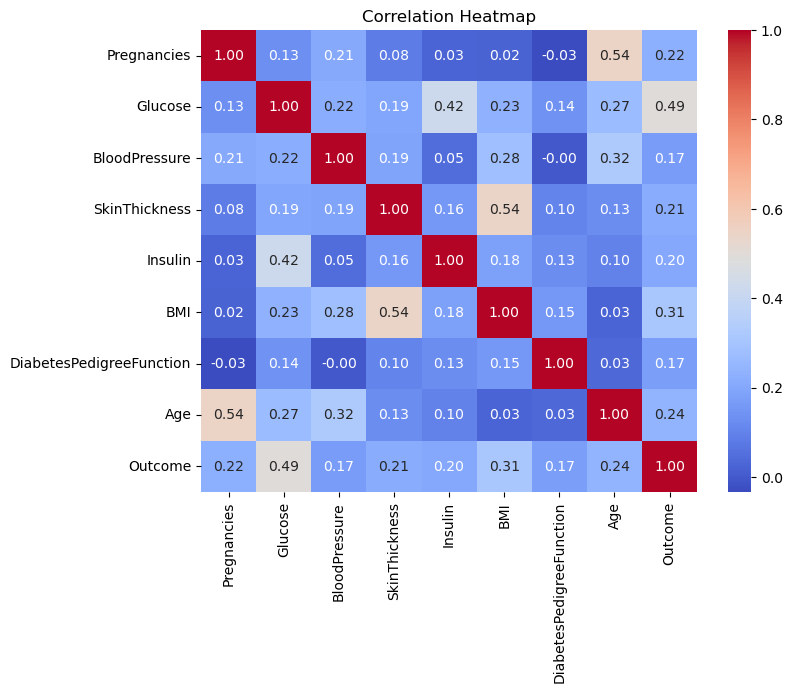

In [18]:
# Step 5: Correlation Analysis - Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

***Notes:***
* Glucose can be a strong Predictor
* BMI and Age can be can be moderate Predictor

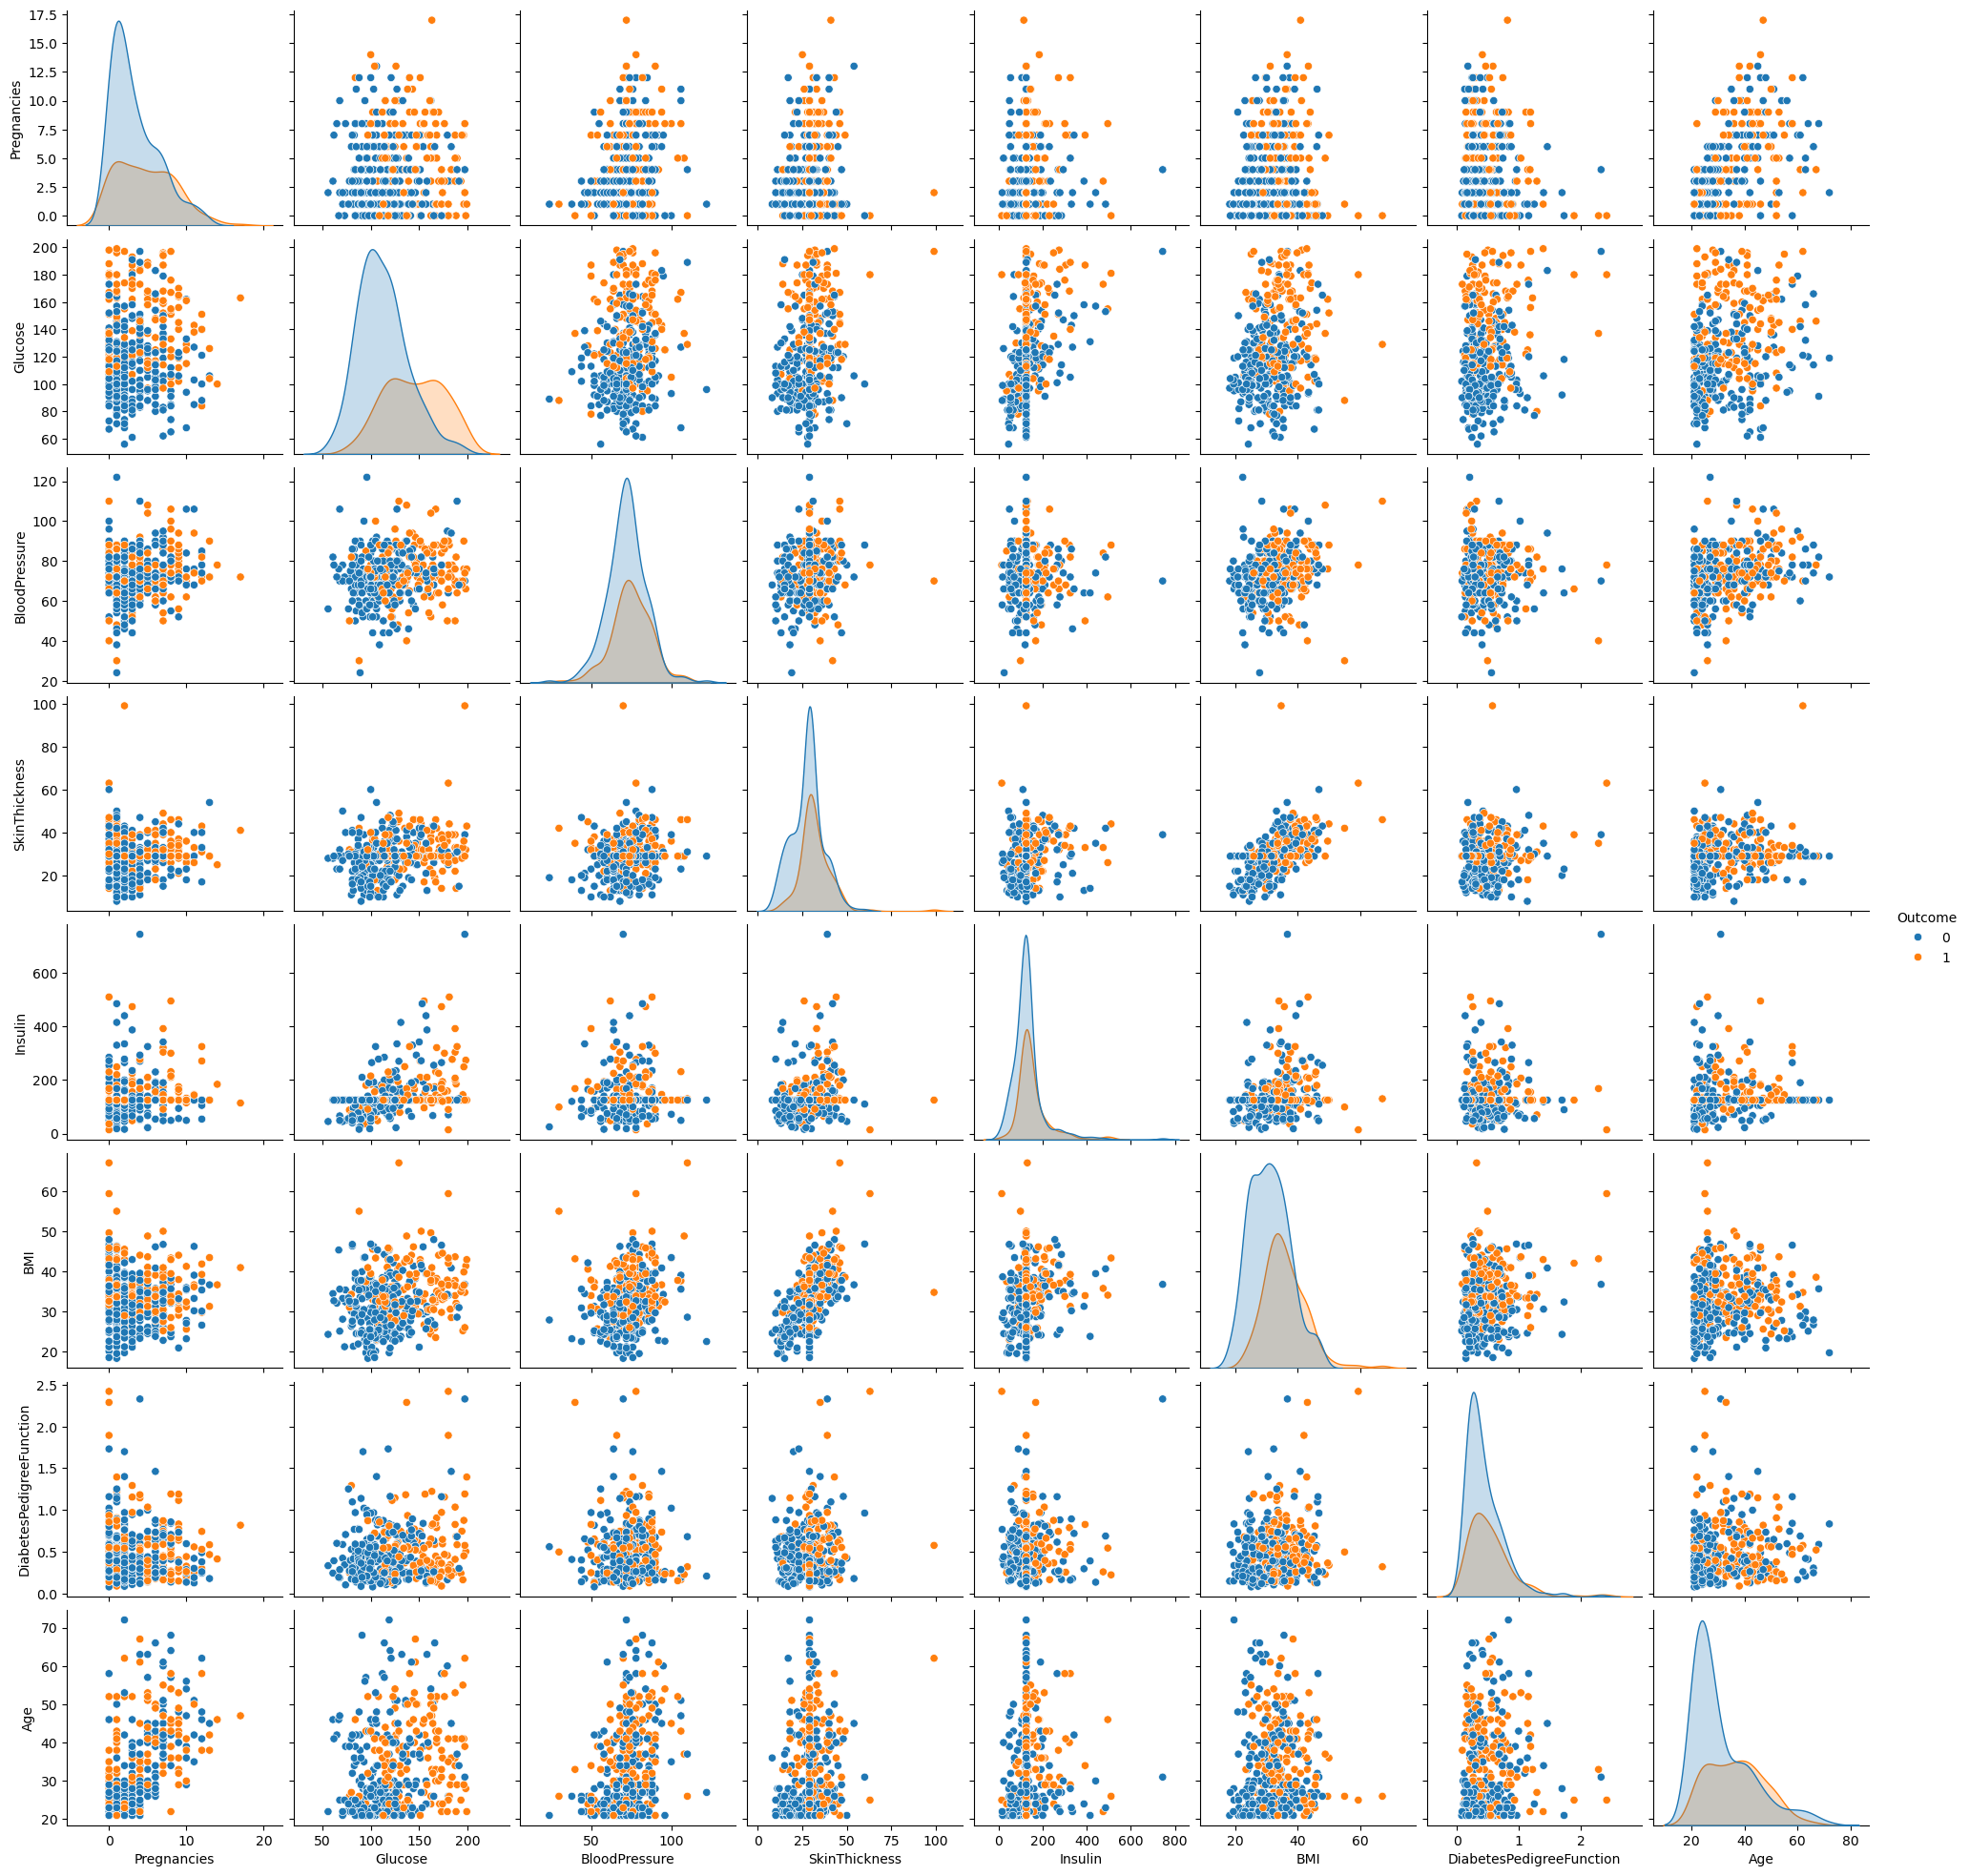

In [19]:
#Pairplot
sns.pairplot(df.sample(400), hue="Outcome")

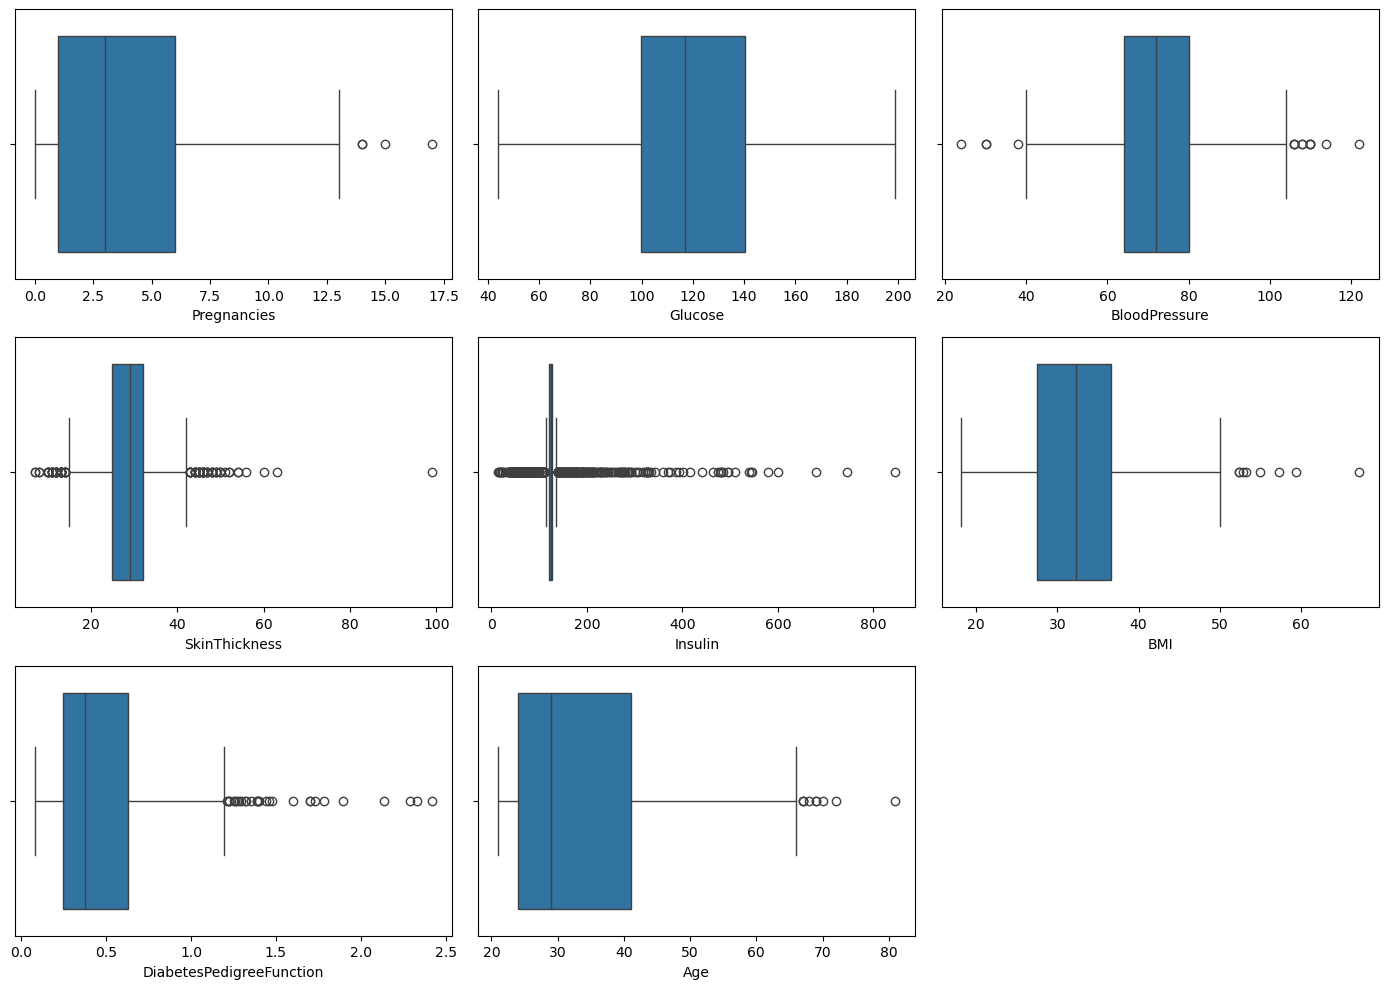

In [20]:
# Step 6: Outlier Detection
plt.figure(figsize=(14,10))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

***Notes: Insulin has very high number of Outliers***

In [21]:
# Step 7: Do We Need Standardization (Scaling)
range_df = pd.DataFrame({"Min": df.min(), "Max": df.max(), "Diff": df.max()-df.min()})
range_df.round(1)

,Min,Max,Diff
Pregnancies,0.0,17.0,17.0
Glucose,44.0,199.0,155.0
BloodPressure,24.0,122.0,98.0
SkinThickness,7.0,99.0,92.0
Insulin,14.0,846.0,832.0
BMI,18.2,67.1,48.9
DiabetesPedigreeFunction,0.1,2.4,2.3
Age,21.0,81.0,60.0
Outcome,0.0,1.0,1.0


***Note: Standardization is required as ranges differ widely (a lot).***

**Best scaler choice:**
* works well for logistic regression
* works well for neural networks
* handles Gaussian-like data

In [22]:
# Step 8: Prepare Final Modeling Dataset
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [23]:
# Step 9: Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = y

#### Phase 4: Model Pipeline

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [26]:
# stratify=y_final  : important for imbalance

#### Phase 5: Build logistic regression baseline

In [27]:
# Step 1: Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
# Step 2: Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [29]:
# Step 3: Accuracy (Baseline Only)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.701


In [30]:
# Step 4: Classification Report (VERY IMPORTANT)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



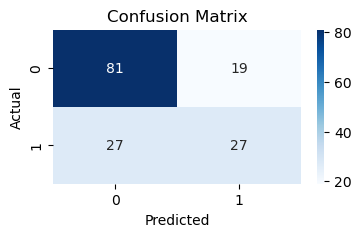

In [31]:
# Step 5: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Step 6: ROC Curve
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", round(auc, 3))

ROC-AUC: 0.813


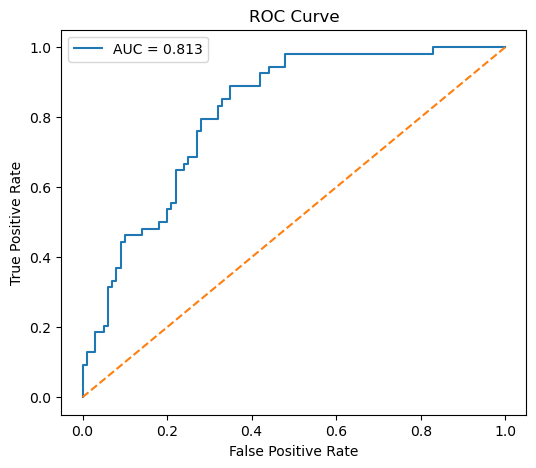

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

***Note:***
* Logistic regression provides a reasonable baseline.
* Due to class imbalance, recall and ROC-AUC are more informative than accuracy.
* Glucose-driven separation is evident.

#### Phase 6: Classical ML to Deep Learning baseline.

In [34]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [35]:
print(y_train.shape, y_test.shape)

(614,) (154,)


In [36]:
# Step 1: Build Neural Network (Baseline)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [38]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

Architecture : 16 - 8 - 1

In [39]:
# Step 2: Model Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

binary_crossentropy - for binary target

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#Step 3: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6864 - loss: 0.6418 - val_accuracy: 0.7317 - val_loss: 0.5953
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 0.5907 - val_accuracy: 0.7561 - val_loss: 0.5634
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7658 - loss: 0.5535 - val_accuracy: 0.7642 - val_loss: 0.5317
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7800 - loss: 0.5218 - val_accuracy: 0.7642 - val_loss: 0.5034
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7739 - loss: 0.4969 - val_accuracy: 0.7642 - val_loss: 0.4793
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7800 - loss: 0.4779 - val_accuracy: 0.7886 - val_loss: 0.4660
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7800 - loss: 0.4645 - val_accuracy: 0.8049 - val_loss: 0.4528
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7821 - loss: 0.4549 - val_accuracy: 0.8049 - val_

***Note:*** feedforward - loss computation - backprop - weight update

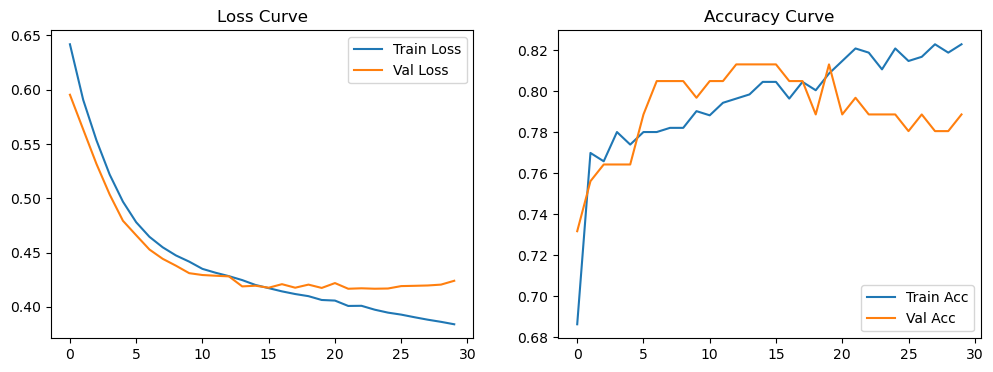

In [42]:
#Step 4: Plot Learning Curves

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

In [43]:
# Step 5: Evaluate on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
round(test_acc, 3)

0.727

In [44]:
# Step 6: Predictions
y_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [45]:
print(y_pred_nn)

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0]


In [46]:
# Step 7: Classification Report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [47]:
# Step 8: ROC-AUC
auc_nn = roc_auc_score(y_test, y_prob_nn)
print("NN ROC-AUC:", round(auc_nn, 3))

NN ROC-AUC: 0.821


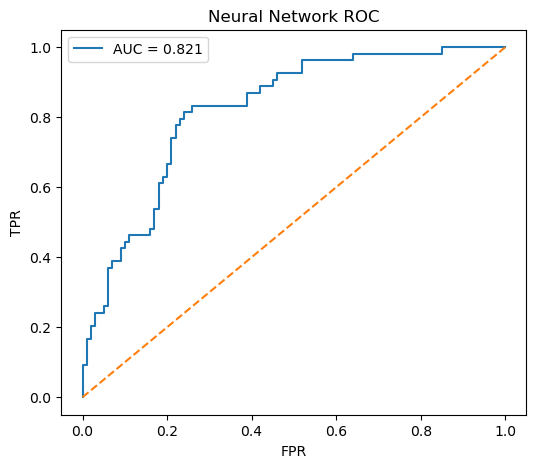

In [48]:
# Step 9: ROC Plot
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_nn:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Neural Network ROC")
plt.legend()
plt.show()

***Note: The neural network captures nonlinear relationships and slightly improves ROC-AUC over logistic regression***